# Setting up GPU-Enabled

In [1]:
# Setting GPU-enabled Tensorflow
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

# Import Packages

In [2]:
import os
import re
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

In [3]:
# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.config.experimental.list_physical_devices("GPU"))
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

The following GPU devices are available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available:  1


In [4]:
dataset =os.path.join(os.getcwd(),r"Dataset")

# Load Dataset

In [5]:
images  = []
labels = []
i=0

for dfolder in os.listdir(dataset):
    dfolder = os.path.join(dataset,dfolder)
    for image_file in os.listdir(dfolder):
        img_path = os.path.join(dfolder, image_file)
        img_label = re.findall(r'\b(\w+-)\b',image_file)[0][:-1]
        print(img_path, img_label)
        
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)

        images.append(image)
        labels.append(img_label)


C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-1.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-10.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-100.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-101.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-102.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-103.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-104.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-105.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-106.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-107.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-108.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-109.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-11.

C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-222.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-223.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-224.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-225.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-226.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-227.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-228.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-229.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-23.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-230.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-231.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-232.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-2

C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-360.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-361.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-362.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-363.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-364.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-365.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-366.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-367.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-368.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-369.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-37.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-370.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-3

C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-491.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-492.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-493.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-494.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-495.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-496.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-497.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-498.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-499.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-5.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-50.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-500.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-51.

C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-131.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-132.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-133.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-134.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-135.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-136.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-137.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-138.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-139.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-14.png Lung_Opacity
C:\Users\Us

C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-213.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-214.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-215.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-216.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-217.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-218.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-219.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-22.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-220.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-221.png Lung_Opacity
C:\Users\Us

C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-302.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-303.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-304.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-305.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-306.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-307.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-308.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-309.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-31.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-310.png Lung_Opacity
C:\Users\Us

C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-393.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-394.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-395.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-396.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-397.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-398.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-399.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-4.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-40.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-400.png Lung_Opacity
C:\Users\User

C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-483.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-484.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-485.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-486.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-487.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-488.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-489.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-49.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-490.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-491.png Lung_Opacity
C:\Users\Us

C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-12.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-120.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-121.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-122.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-123.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-124.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-125.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-126.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-127.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-128.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-129.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-13.png Normal
C:\Users\User\Code\WID3008 Ima

C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-248.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-249.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-25.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-250.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-251.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-252.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-253.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-254.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-255.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-256.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-257.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-258.png Normal
C:\Users\User\Code\WID3008 Im

C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-378.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-379.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-38.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-380.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-381.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-382.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-383.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-384.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-385.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-386.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-387.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-388.png Normal
C:\Users\User\Code\WID3008 Im

C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-54.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-55.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-56.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-57.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-58.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-59.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-6.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-60.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-61.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-62.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-63.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-64.png Normal
C:\Users\User\Code\WID3008 Image Processi

In [6]:
# convert the data and labels to NumPy arrays
data = np.array(images, dtype="float32")
labels = pd.get_dummies(labels).to_numpy()

# Train Test Split

In [7]:
# using sklearn.preprocessing splitting the dataset into training dataset and testing dataset
(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.30, stratify=labels, random_state=10)

In [8]:
# define an data augmentation object to perform data augmentation while feeding forward into the Face Mask Detector model
aug = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,
                         height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,fill_mode="nearest")

In [10]:
# load the Xception network, ensuring the head FC layer sets are left off
baseModel = Xception(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

83689472/83683744 [==============================] - 17s 0us/step


In [11]:
baseModel.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [12]:
# construct the head of the model that will be placed on top of the
# the base model
# Softmax is used for multiclass classification problem.
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation="softmax")(headModel)

In [13]:
model = Model(inputs=baseModel.input, outputs=headModel)

In [14]:
# Due to the baseModel is Xception and the weights are trained,
# so we do not need to train the parameters of the layers again, 
# therefore we only train our fully connected layers' parameters
for layer in baseModel.layers:
    layer.trainable = False

In [15]:
# We can see that the number of trainable params is 262,659 where these are 
# are the parameters from headModel, while non-trainable params are consists of 
# feature extractor of the VGG19
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

# Train Model

In [16]:
# defining the learning rate, epochs and the batch size for training the model
learning_rate = 0.001
epochs = 20
bs = 64

optimizer = Adam(lr= learning_rate, decay=learning_rate/epochs)

model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

hist = model.fit(
    aug.flow(trainX,trainY, batch_size = bs),
    steps_per_epoch = len(trainX)//bs,
    validation_data = (testX, testY),
    validation_steps = len(testX)//bs,
    epochs = epochs
)

model.save(os.getcwd()+r"\xception_chest_xray_classification_model")

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
16/16 [==============================] - 87s 5s/step - loss: 0.7613 - accuracy: 0.6288 - val_loss: 0.5921 - val_accuracy: 0.7400
Epoch 2/20
16/16 [==============================] - 61s 4s/step - loss: 0.5442 - accuracy: 0.7708 - val_loss: 0.5451 - val_accuracy: 0.7622
Epoch 3/20
16/16 [==============================] - 62s 4s/step - loss: 0.5214 - accuracy: 0.7759 - val_loss: 0.5044 - val_accuracy: 0.7933
Epoch 4/20
16/16 [==============================] - 62s 4s/step - loss: 0.4916 - accuracy: 0.7931 - val_loss: 0.4733 - val_accuracy: 0.8133
Epoch 5/20
16/16 [==============================] - 62s 4s/step - loss: 0.4453 - accuracy: 0.8276 - val_loss: 0.4902 - val_accuracy: 0.7867
Epoch 6/20
16/16 [==============================] - 62s 4s/step - loss: 0.4730 - accuracy: 0.8012 - val_loss: 0.4402 - val_accuracy: 0.8111
Epoch 7/20
16/16 [==============================] - 63s 4s/step - loss: 0.4463 - accuracy: 0.8022 - val_loss: 0.4416 - val_accuracy: 0.8044
Epoch 8/20
16/16 [==

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: C:\Users\User\Code\WID3008 Image Processing\xception_chest_xray_classification_model\assets


# Evaluate Model

In [17]:
predict = model.predict(testX, batch_size = bs)

In [18]:
predict = np.argmax(predict,axis=1)
print(classification_report(testY.argmax(axis=1), predict, target_names=['COVID','Lung Opacity','Normal']))

              precision    recall  f1-score   support

       COVID       0.87      0.65      0.75       150
Lung Opacity       0.69      0.89      0.78       150
      Normal       0.94      0.91      0.92       150

    accuracy                           0.82       450
   macro avg       0.83      0.82      0.82       450
weighted avg       0.83      0.82      0.82       450



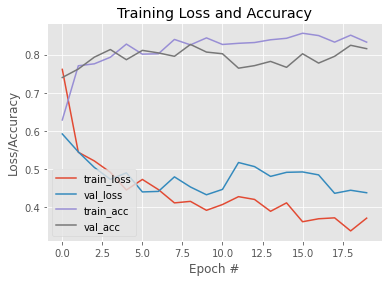

In [19]:
# plot the training loss and accuracy graphs of training and validation 
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), hist.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), hist.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), hist.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
